In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Load data

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow import keras

In [ ]:
print(f'Tensorflow version: {tf.__version__})\nKeras: {keras.__version__}')

Tensorflow version: 2.18.0)
Keras: 3.8.0


In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
X_train.dtype, y_train.dtype

(dtype('uint8'), dtype('uint8'))

In [ ]:
class_names = [0,1,2,3,4,5,6,7,8,9]

class_num = len(class_names)
print(class_num)


10


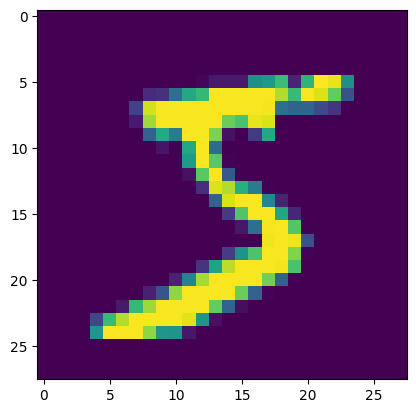

In [ ]:
plt.imshow(X_train[0])

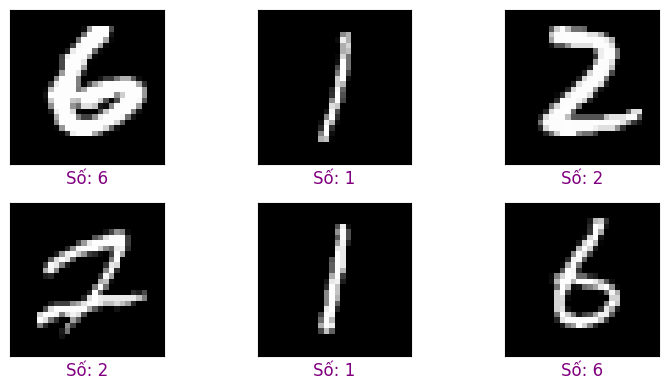

In [ ]:
def plot_data(x_data: np.ndarray, y_data: np.ndarray) -> None:
  nrows, ncols = 2, 3
  fig, axes = plt.subplots(nrows, ncols, figsize=(8,4))

  len_x = x_data.shape[0]
  for idx in range(nrows*ncols):
    ax = axes[idx // ncols, idx % ncols]

    img_idx = random.randint(0, len_x)

    ax.imshow(x_data[img_idx], cmap='gray')
    ax.set(xticks=[], yticks=[])

    true_label_str = f"Số: {class_names[y_data[img_idx]]}"
    ax.set_xlabel(true_label_str, color = 'Purple', fontsize = 12)

  plt.tight_layout()
  plt.show()
plot_data(X_test, y_test)

2. Image Pre-processing

In [ ]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [ ]:
X_test.shape, X_test.dtype


((10000, 28, 28), dtype('float32'))

In [ ]:
X_train = np. expand_dims(X_train, axis=-1)
X_test = np. expand_dims(X_test, axis=-1)

In [ ]:
X_train.shape, X_train.dtype

((60000, 28, 28, 1), dtype('float32'))

In [ ]:
X_test.shape, X_test.dtype

((10000, 28, 28, 1), dtype('float32'))

In [ ]:
y_train_label = keras.utils.to_categorical(y_train, class_num)
y_test_label = keras.utils.to_categorical(y_test, class_num)

In [ ]:
y_train[0], y_train_label[0]

(np.uint8(5), array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]))

3. Network (CNN)

In [ ]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.summary()
model.compile(
    optimizer='adam',  # Using Adam optimizer
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 6
batch_size = 256
history = model.fit(X_train, y_train_label,
          epochs=epochs,
          batch_size=batch_size,
          validation_split=0.1
        )

Epoch 1/6
211/211 ━━━━━━━━━━━━━━━━━━━━ 43s 196ms/step - accuracy: 0.7542 - loss: 0.8702 - val_accuracy: 0.9720 - val_loss: 0.1040
Epoch 2/6
211/211 ━━━━━━━━━━━━━━━━━━━━ 81s 190ms/step - accuracy: 0.9672 - loss: 0.1126 - val_accuracy: 0.9818 - val_loss: 0.0658
Epoch 3/6
211/211 ━━━━━━━━━━━━━━━━━━━━ 37s 172ms/step - accuracy: 0.9785 - loss: 0.0703 - val_accuracy: 0.9837 - val_loss: 0.0610
Epoch 4/6
211/211 ━━━━━━━━━━━━━━━━━━━━ 42s 176ms/step - accuracy: 0.9839 - loss: 0.0549 - val_accuracy: 0.9853 - val_loss: 0.0559
Epoch 5/6
211/211 ━━━━━━━━━━━━━━━━━━━━ 40s 174ms/step - accuracy: 0.9851 - loss: 0.0481 - val_accuracy: 0.9863 - val_loss: 0.0443
Epoch 6/6
211/211 ━━━━━━━━━━━━━━━━━━━━ 40s 170ms/step - accuracy: 0.9869 - loss: 0.0458 - val_accuracy: 0.9863 - val_loss: 0.0454


In [ ]:
history_dict = history.history

In [ ]:
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
train_loss, val_loss = history_dict['loss'], history_dict['val_loss']
train_acc, val_acc = history_dict['accuracy'], history_dict['val_accuracy']


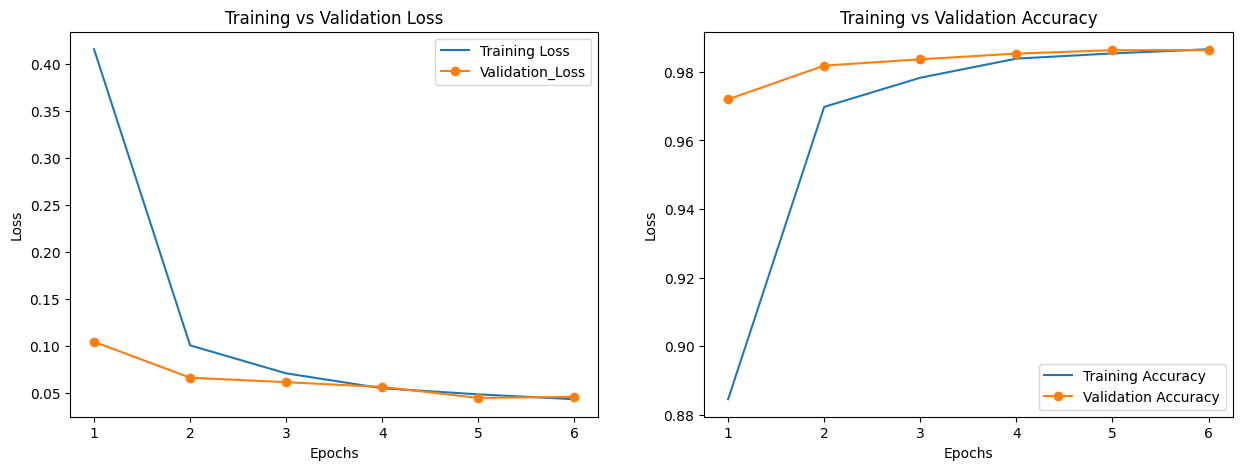

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5)) # Changed figsize(15,5) to figsize=(15,5)
epochs_runs = [i+1 for i in range(epochs)]

ax1.plot(epochs_runs, train_loss, label = 'Training Loss')
ax1.plot(epochs_runs, val_loss, label = 'Validation_Loss', marker = 'o')
ax1.set(title = 'Training vs Validation Loss', xlabel = 'Epochs', ylabel = 'Loss')
ax1.legend()

ax2.plot(epochs_runs, train_acc, label = 'Training Accuracy')
ax2.plot(epochs_runs, val_acc, label = 'Validation Accuracy', marker = 'o')
ax2.set(title = 'Training vs Validation Accuracy', xlabel = 'Epochs', ylabel = 'Loss')
ax2.legend()
plt.show()

4. Model Evaluation

In [ ]:
score = model.evaluate(X_test, y_test_label)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9819 - loss: 0.0511


In [ ]:
print(f'Test loss: {score[0]:.4f}')
print(f'Test accuracy: {score[1]:.4f}')

Test loss: 0.0417
Test accuracy: 0.9859


5. Prediction

In [ ]:
X_sample = X_test[:3]
y_proba = model.predict(X_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


In [ ]:
y_proba.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.003, 0.997, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [ ]:
prediction = np.argmax(y_proba, axis = 1)

In [ ]:
[class_names[pred] for pred in prediction]

[7, 2, 1]

In [ ]:
y_proba = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [ ]:
from typing import Optional
def plot_predict(x_data: np.ndarray, y_data: np.ndarray, y_proba: Optional[np.ndarray] = None) -> None:
  nrows, ncols = 2, 4
  fig, axes = plt.subplots(nrows, ncols, figsize= (8,4))

  len_x = x_data.shape[0]
  for idx in range(nrows*ncols):
    ax = axes[idx // ncols, idx % ncols]

    img_idx = random.randint(0, len_x)

    ax.imshow(x_data[img_idx], cmap= 'gray')
    ax.set(xticks=[], yticks=[])
    color = 'purple'
    true_label_str = f'True: {class_names[y_data[img_idx]]}'

    if y_proba is not None:
      predicted_idx = np.argmax(y_proba[img_idx])
      predicted_label = class_names[predicted_idx]
      color = 'red' if predicted_idx != y_data[img_idx] else color
      predicted_label_str = f'\nPedicted: {predicted_label}'

    img_title = true_label_str if y_proba is None else true_label_str + predicted_label_str
    ax.set_xlabel(img_title, color = color, fontsize = 12)

  plt.tight_layout()
  plt.show()

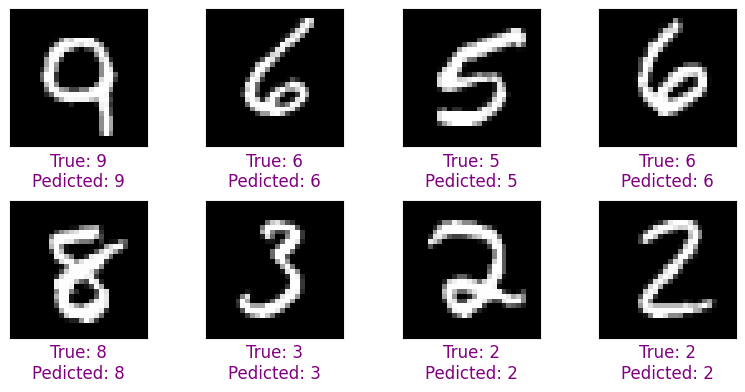

In [ ]:
plot_predict(X_test, y_test, y_proba)